# Running and visualising a PROCESS scan

Perform a parameter scan for a given input file and plot the results.

## Scan details

The input file is a scan-enabled version of the large tokamak `IN.DAT`, as found in the `tests` directory. The scan-relevant values are:
```
nsweep = 17 * b_tf_inboard_max, maximum peak toroidal field (T) (`constraint equation 25`)
isweep = 6
sweep = 11., 11.2, 11.4, 11.6, 11.8, 12.
```

- `nsweep`: integer denoting the variable to scan (see `scan_module` for options). Here `17` corresponds to `b_tf_inboard_max` being scanned
- `isweep`: the number of scan points to run
- `sweep`: array of values for the scanned variable to take; one for each run. Should be of length `isweep`

In [1]:
from pathlib import Path

from process.main import SingleRun, setup_loggers

# setup the loggers so that the output is not spammed with model errors/warnings
setup_loggers()

data_dir = Path("data")
input_name = data_dir / "scan_example_file_IN.DAT"
# Perform a SingleRun on a scan-enabled input file
single_run = SingleRun(str(input_name), solver="vmcon_bounded")
single_run.run()

The IN.DAT file does not contain any obsolete variables.
 
**************************************************************************************************************
************************************************** PROCESS ***************************************************
************************************** Power Reactor Optimisation Code ***************************************
**************************************************************************************************************
 
Version : 3.2.1
Git Tag : 
Git Branch : 
Date : 13/11/2025 UTC
Time : 14:09
User : jaebeomcho
Computer : Jaebeoms-MacBook-Pro-4.local
Directory : /Users/jaebeomcho/Desktop/code/PROCESS/examples
Input : /Users/jaebeomcho/Desktop/code/PROCESS/examples/data/scan_example_file_IN.DAT
Run title : Generic large tokamak
Run type : Reactor concept design: Pulsed tokamak model, (c) UK Atomic Energy Authority
 
*******************************************************************************************

/Users/jaebeomcho/Desktop/code/PROCESS/process/init.py:92: UserWarning: Lower limit of volume averaged electron temperature (temp_plasma_electron_vol_avg_kev) has been raised to ensure temp_plasma_electron_vol_avg_kev > temp_plasma_pedestal_kev
  check_process(inputs)
/Users/jaebeomcho/Desktop/code/PROCESS/process/init.py:92: UserWarning: temp_cs_superconductor_margin_min and tmargmin should not both be specified in IN.DAT temp_cs_superconductor_margin_min has been ignored
  check_process(inputs)
/Users/jaebeomcho/Desktop/code/PROCESS/process/physics.py:7711: RuntimeWarning: divide by zero encountered in scalar divide
  * (nd_plasma_pedestal_electron / n_greenwald) ** -0.174
/Users/jaebeomcho/Desktop/code/PROCESS/process/costs.py:3030: RuntimeWarning: invalid value encountered in sqrt
  annoam = cost_variables.ucoam[cost_variables.lsa - 1] * np.sqrt(
/Users/jaebeomcho/Desktop/code/PROCESS/process/costs.py:3101: RuntimeWarning: invalid value encountered in sqrt
  annwst = cost_variables

7 | Convergence Parameter: 8.040E-10
 
************************************* PROCESS found a feasible solution **************************************
 
******************************************** Errors and Warnings *********************************************
(/Users/jaebeomcho/Desktop/code/PROCESS/process/physics.py:6653) Diamagnetic fraction is more than 1%, but not calculated. Consider using i_diamagnetic_current=2 and i_pfirsch_schluter_current=1

(/Users/jaebeomcho/Desktop/code/PROCESS/process/tf_coil.py:246) dr_tf_plasma_case to small to accommodate the WP, forced to minimum value

(/Users/jaebeomcho/Desktop/code/PROCESS/process/pfcoil.py:2385) CS not using max current density: further optimisation may be possible
Starting scan point 2 of 6 : Max_toroidal_field_(T) , b_tf_inboard_max = 11.2
2 | Convergence Parameter: 2.129E-10
 
************************************* PROCESS found a feasible solution **************************************
 
*************************************

## Plot scan results
Use `plot_scans.py` to plot the resulting `MFILE.DAT`.

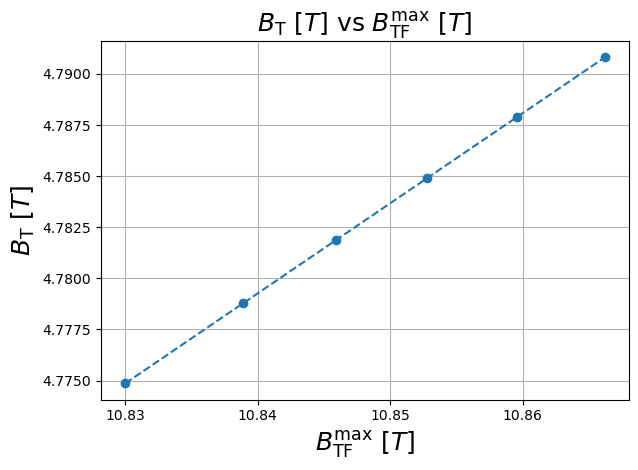

<Figure size 640x480 with 0 Axes>

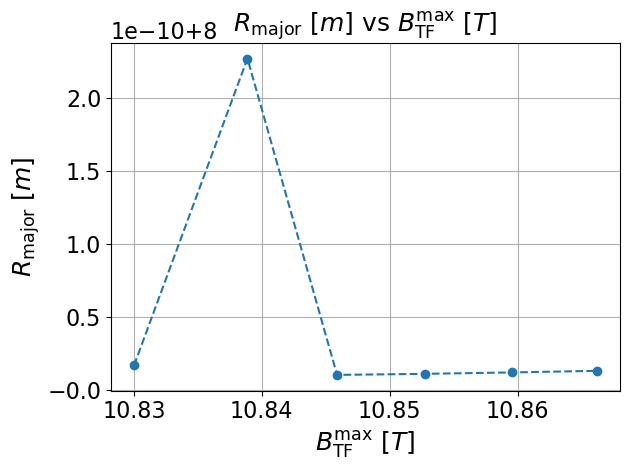

<Figure size 640x480 with 0 Axes>

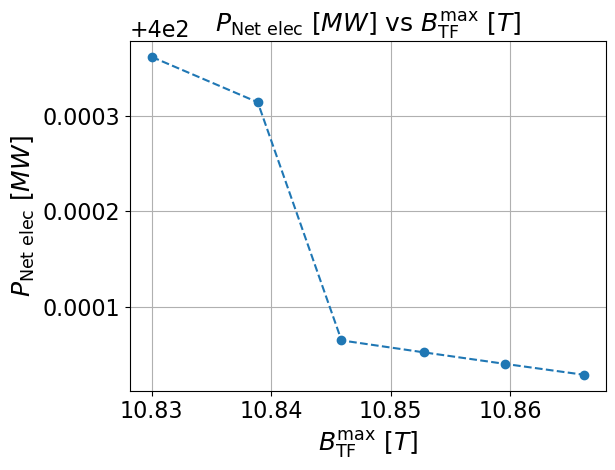

<Figure size 640x480 with 0 Axes>

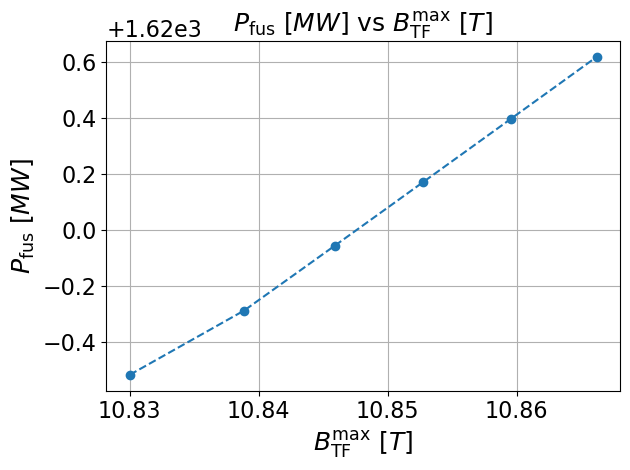

<Figure size 640x480 with 0 Axes>

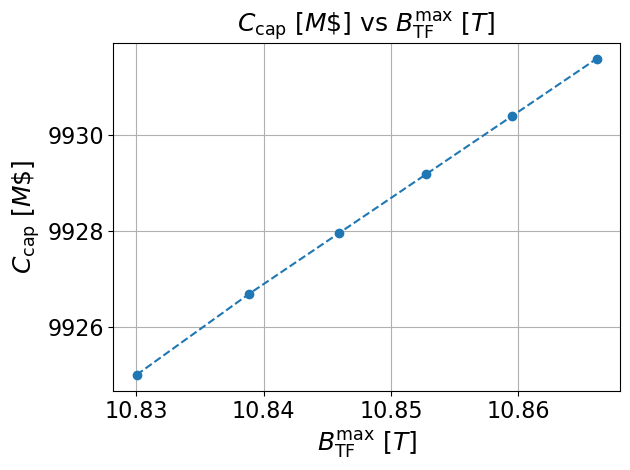

In [2]:
%matplotlib inline
from process.io import plot_scans

# Define working directory relative to project dir and input file name
mfile_name = data_dir / "scan_example_file_MFILE.DAT"
output_dir = data_dir

plot_scans.main(
    args=[
        "-f",
        str(mfile_name),
        "-yv",
        "b_plasma_toroidal_on_axis rmajor p_plant_electric_net_mw p_fusion_total_mw capcost",
        "--outputdir",
        str(output_dir),
    ]
)